In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib

In [4]:
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : ".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))
 
    print("Kernel Shape : {}".format(kernel.shape))
 
    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    m = np.zeros(image.shape)
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    print("Output Image size : {}".format(output.shape))
     
    if verbose:
        plt.imshow(output)
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()
        
    return output

Found 3 Channels : 
Converted to Gray Channel. Size : (800, 690)
Kernel Shape : (3, 3)
Output Image size : (800, 690)


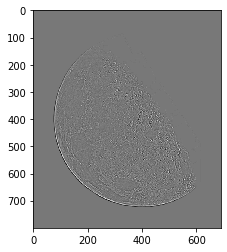

In [5]:
def laplacee(image, filter, verbose=False):      
    new_image_y = convolution(image, filter, verbose)
    if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.show()
if __name__ == '__main__':
    filter = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
 
 
    image = cv2.imread("blurry-moon.tif")
    laplacee(image, filter, verbose=True)


*Compared to the fig 3.56 my output image looks more dark and with random noise which failed to emulate the same response as given fig in Book. The fig image shows a very clear border and clean edges.* 